# **Quick Sort**

## **목차**

---
##### 1. Qucik 정렬 단어 정의   
##### 2. 코드로 알아보는 Quick Sort   
##### 3. 알고리즘 예제
##### 4. 결론   

---

## 1. **Quick Sort 란?**
- 이름 그대로 빠르게 정렬을 수행하는 알고리즘으로 분할 정복의 성격을 가지고 있는 정렬로 실제로 많이 사용되는 대표적인 정렬 알고리즘

##### **1. Qucik 정렬의 개념 및 동작 원리**
- 하나의 리스트를 피벗 기준으로 두 개의 비균등한 크기로 분할하고 분할된 부분 리스트를 정렬한 다음, 두 개의 정렬된 부분 리스트를 합하여 전체가 정렬된 리스트가 되게 하는 방법
   
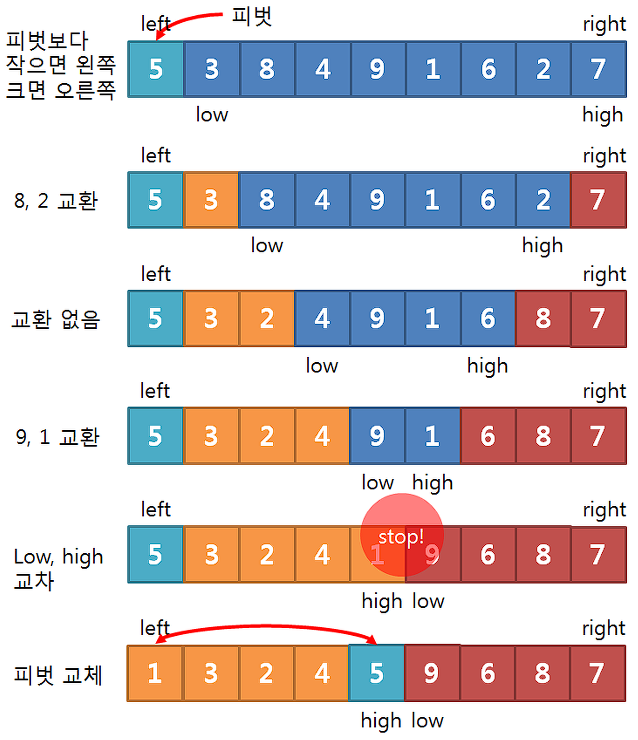   

- **Qucik 정렬의 3단계**
    1. 분할(Divide) : 입력 배열을 피벗 기준으로 비균등하게 2개의 부분 배열(피벗을 중심으로 왼쪽 = 피벗보다 작은 요소들, 오른쪽 = 피벗보다 큰 요소들)로 분할한다.
    2. 정복 (Conquer) : 부분 배열을 정렬한다. 부분 배열의 크기가 충분히 작지 않다면 순환 호출을 이용하여 다시 분할 정복 방법을 적용한다.
    3. 결합 (Combine) : 정렬된 부분 배열들을 하나의 배열에 합병한다.   

- **동작 원리**
    1. 리스트 가운데서 하나의 원소를 고른다. 고른 원소를 피벗(pivot == 기준점)이라고 한다.
    2. 피벗 앞에는 피벗보다 값이 작은 모든 원소들이 오고, 피벗 뒤에는 피벗보다 값이 큰 모든 원소들이 오도록 피벗을 기준으로 리스트를 둘로 나눈다. (이렇게 리스트를 둘로 나누는 것을 분할이라고 함) 분할을 마친 뒤에 피벗은 더 이상 움직이지 않는다. -> 파티션(partition)
    3. 분할된 두 개의 작은 리스트에 대해 재귀적으로 이 과정을 반복한다. 재귀는 리스트의 크기가 0이나 1이 될 때까지 반복한다.


##### **2. 시간복잡도**
- 대부분의 경우에 속도가 빠르다.
- 시간 복잡도가 O(nlogn)을 가지고 있어 다른 정렬 알고리즘과 비교했을 때 빠른편이다.   
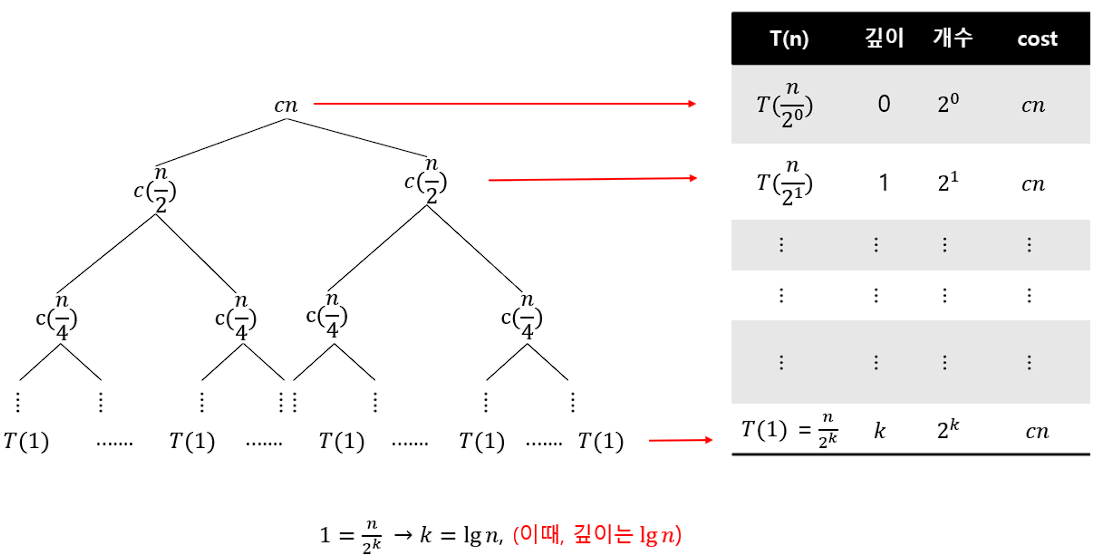

- pivot을 어떻게 선택하냐에 따라 Qucik Sort의 효율성이 달라짐
- Worst case는 O(n^2)   
- Quick 정렬의 속도   
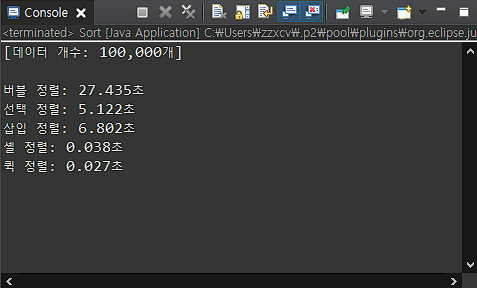


##### **3. Partition 방법**
    in-place로 partition 하기
```c
#include<stdio.h>

void quick_sort(int[], int, int);
int partition(int[], int, int);
#define SWAP(x, y, t) ((t)=(x), (x)=(y), (y)=(t))

int main()
{
	int length;
	int arr[10] = { 10, 28, 30, 2, 15, 8, 67, 45, 3, 11 };
	length = sizeof(arr) / sizeof(int);
	quick_sort(arr, 0, length-1);
	return 0;
}

// quick_sort 함수
void quick_sort(int arr[], int left, int right) {
	int q;
	if (left < right) {	// 배열의 크기가 1일때 까지.
		q = partition(arr, left, right);	// pivot이 가리키는 배열의 index값 반환.
		quick_sort(arr, left, q - 1);		// 왼쪽 배열 정렬.
		quick_sort(arr, q + 1, right);		// 오른쪽 배열 정렬.
	}
}

// partition 함수
int partition(int arr[], int left, int right) {

	int low, high, pivot;
	int *temp;

	low = left;
	high = right + 1;
	pivot = arr[left];

	// 피벗을 기준으로 두 개의 배열로 나눔.
	do {
		do {
			low++;
		} while (low <= right && arr[low] < pivot);
		do {
			high--;
		} while (high >= left && arr[high] > pivot);
		if (low < high) {		// low가 high값보다 작을 때까지 양쪽 배열의 값을 SWAP해줌. 
			SWAP(arr[low], arr[high], temp);
		}
	} while (low < high);
	SWAP(arr[left], arr[high], temp);   // pivot이 가리키는 값과 pivot이 위치할 값 SWAP.

	return high;           // pivot 가리키는 index 반환.
}
```

---

## **2. 코드로 확인해보기**

##### **1. 파이썬 코드**
```python
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x <= pivot]
    right = [x for x in arr[1:] if x > pivot]
    return quick_sort(left) + [pivot] + quick_sort(right)

# 테스트
arr = [5, 3, 8, 4, 2, 7, 1, 6]
sorted_arr = quick_sort(arr)
print(sorted_arr)

```


##### **2. 자바 코드**
```java
public class QuickSorter {
    public static void quickSort(int[] arr) {
        sort(arr, 0, arr.length - 1);
    }

    private static void sort(int[] arr, int low, int high) {
        if (low >= high) return;

        int mid = partition(arr, low, high);
        sort(arr, low, mid - 1);
        sort(arr, mid, high);
    }

    private static int partition(int[] arr, int low, int high) {
        int pivot = arr[(low + high) / 2];
        while (low <= high) {
            while (arr[low] < pivot) low++;
            while (arr[high] > pivot) high--;
            if (low <= high) {
                swap(arr, low, high);
                low++;
                high--;
            }
        }
        return low;
    }

    private static void swap(int[] arr, int i, int j) {
        int tmp = arr[i];
        arr[i] = arr[j];
        arr[j] = tmp;
    }
}
```

---

## 3. **알고리즘 예제**
https://www.acmicpc.net/problem/2750

```python
# BOJ 재귀호출 깊이가 1000이 한계이므로 재귀호출 깊이 늘려주기
import sys
sys.setrecursionlimit(10**6)

# 입력받기
n = int(input())
inputList = []

for i in range(n) :
  inputList.append(int(input()))

# 퀵소트 함수
def quickSort(tmpList) :
  # 더 이상 정렬할 값이 없는 경우
  if len(tmpList) <= 1 :
    return tmpList

  pivot = tmpList[0] # 피벗
  left, right = [], [] # 왼쪽, 오른쪽 리스트 생성
  
  for item in tmpList[1:] :
    if item < pivot : left.append(item) # pivot보다 작은 경우, left에 삽입
    else : right.append(item) # pivot보다 큰 경우, right에 삽입

  return quickSort(left) + [pivot] + quickSort(right) # 반환

# 퀵소트 함수 호출
resultList = quickSort(inputList)

#출력
for i in range(n) :
  print(resultList[i])
```

---

## **4. 결론**

### * 내가 생각하는 Quick Sort
- 일반적인 Sort 방법들보다 빠른 축에 속하는 정렬 방법으로 느껴진다.
- 다만, 빠른 속도를 내기 위해서는 Partition을 최적화 하는 과정이 필요함
- Partition 을 빠르게 하기 위해 pivot을 골라야하는데, 최적의 pivot을 고르는 방법을 구현하는 과정을 좀 더 고급진 스킬로 찾을 수 있도록 노력해야할 듯..
- 일반적으로는 pivot을 구하기 위해서 난수 분할로 찾는 방법이 있을 듯하나 안정성이 많이 떨어지는 것 같다.
- 대부분의 라이브러리에서는 세 값(좌측, 중앙, 우측)의 중위법을 이용하여 분할하는 방법을 택함
